# products_dataset

### Key Columns:
- *review_creation_answer_time_hours*
- *review_score_extended*

### Foreign Keys:
- *order_id* -> **order_items_dataset** AND **order_payments_dataset**
- *customer_id* -> **order_customer_dataset**

### Key Findings:
- definitely, very large majority of the product photos are of really poor quality, there are very little of medium-quality photos, not to mention the best-quality ones. **92.63**% are of the photos are of the worst quality (1-5 out of 20)
- it is quite surprising that the average length of the product name is almost $50$ words, hopefully that's not what the potential customers see
- there are outliers, especially in 
- the volume of the product is highly correlated with the dimensions of the product. The weight of the product is also highly correlated with the volume of the product. The length, height and width of the product are also highly correlated with the volume of the product. The number of photos of the product is not correlated with any of the other features

### Preprocessing steps:

- remove all missing values
- remove all outliers
- new column: *product_volume* (*product_length_cm* * *product_height_cm* * *product_width_cm*)
- after... join tables to change spanish category names into english versions

$26.75\%$ of data has been removed.

## EDA

In [ ]:
from utils import check_functions, visuals, cleaning, feature_engineering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_colwidth', None)

In [ ]:
products_dataset = pd.read_csv('../data/raw/products_dataset.csv')
products_category_name_translation = pd.read_csv('../data/raw/product_category_name_translation.csv')
products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [4]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [5]:
check_functions.missing_values(products_dataset)

,Column,Missing Values
0,product_id,0
1,product_category_name,610
2,product_name_lenght,610
3,product_description_lenght,610
4,product_photos_qty,610
5,product_weight_g,2
6,product_length_cm,2
7,product_height_cm,2
8,product_width_cm,2


Only $1.85$% of the data have missing values, without hesitation, we will remove it.

In [22]:
products_dataset[products_dataset["product_category_name"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [6]:
check_functions.nunique_values(products_dataset)

,Column,Nunique
0,product_id,32951
1,product_category_name,73
2,product_name_lenght,66
3,product_description_lenght,2960
4,product_photos_qty,19
5,product_weight_g,2204
6,product_length_cm,99
7,product_height_cm,102
8,product_width_cm,95


In [7]:
check_functions.duplicates(products_dataset)

There are no duplicates.


In [8]:
numerical_summary, object_summary = check_functions.summarize(products_dataset)

In [9]:
numerical_summary

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


It is quite surprising that the average length of the product name is almost $50$ words, hopefully that's not what the potential customers see.

In [10]:
object_summary

,count,unique,top,freq
product_id,32951,32951,1e9e8ef04dbcff4541ed26657ea517e5,1
product_category_name,32341,73,cama_mesa_banho,3029


In [11]:
check_functions.outliers(products_dataset, ["product_name_lenght", "product_description_lenght", "product_weight_g", 
                                            "product_length_cm", "product_height_cm", "product_width_cm"])

,Outlier Count,Outlier Percentage (%)
Column,,
product_weight_g,4551,13.811417
product_description_lenght,2078,6.306334
product_height_cm,1892,5.741859
product_length_cm,1380,4.188037
product_width_cm,912,2.767746
product_name_lenght,290,0.880095


All duplicates to be removed.

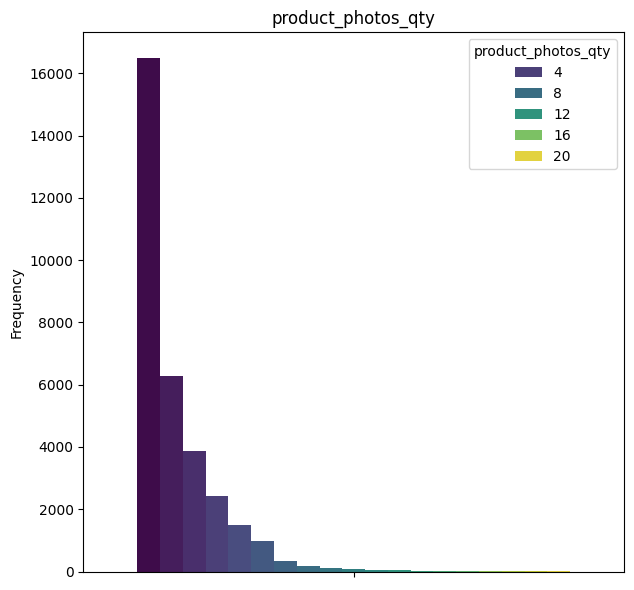

In [12]:
visuals.barplots(products_dataset, ['product_photos_qty'])

Definitely, very large majority of the product photos are of really poor quality, there are very little of medium-quality photos, not to mention the best-quality ones. **92.63**% are of the photos are of the worst quality (1-5 out of 20).

c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset, x=column, kde=True, ax=axes[i], palette=sns.color_palette("viridis", as_cmap=True))
c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset, x=column, kde=True, ax=axes[i], palette=sns.color_palette("viridis", as_cmap=True))
c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset, x=column, kde=True, ax=axes[i], palette=sns.color_palette("viridis", as_cmap=True))
c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been ass

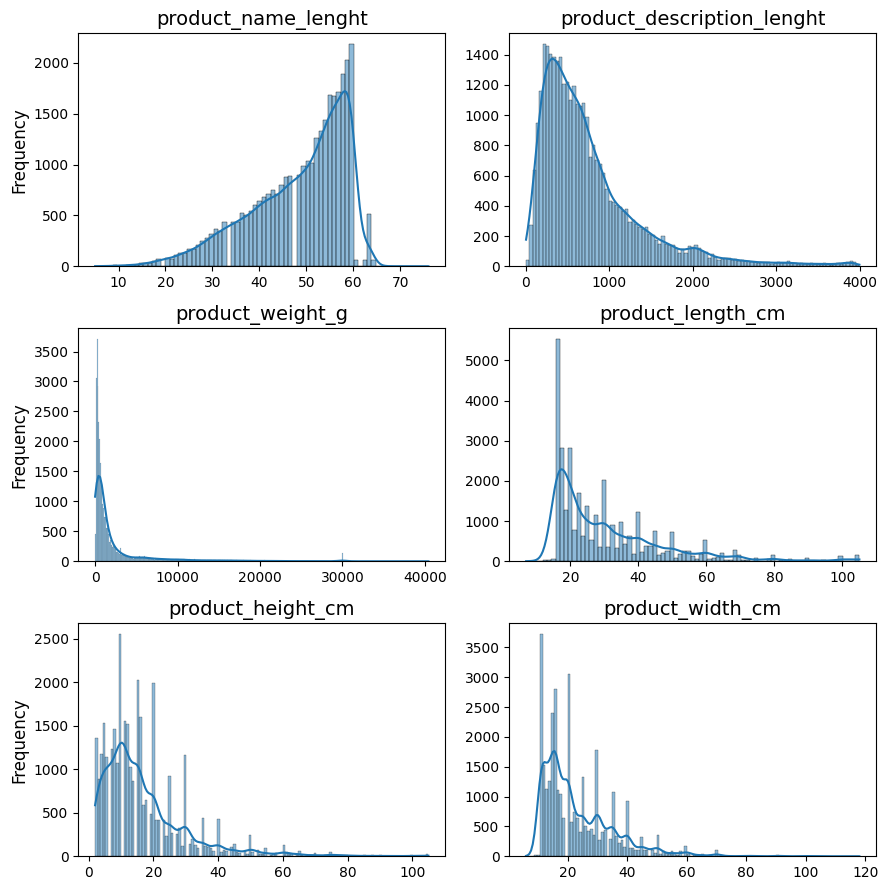

In [13]:
visuals.histograms(products_dataset, ["product_name_lenght", "product_description_lenght", "product_weight_g", 
                                      "product_length_cm", "product_height_cm", "product_width_cm"])

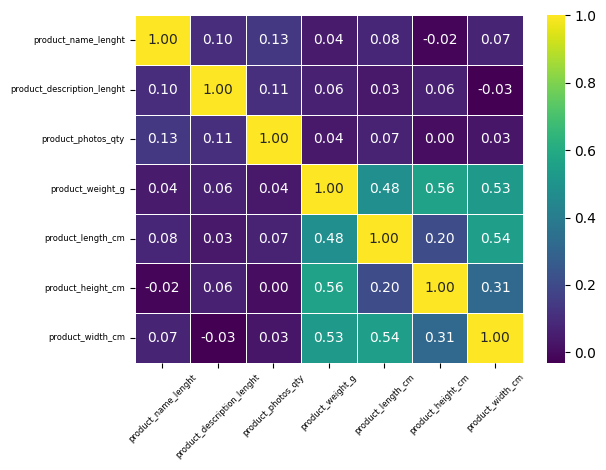

In [14]:
visuals.correlations(products_dataset, ["product_name_lenght", "product_description_lenght", "product_photos_qty", 
                                        "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"])

Not very significant correlations between any variables, the values about $0.5$ are for *product_photos_qty* (categorical) and dimension and weight columns. We can examine this correlation after creating the new *product_volume* feature.

C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

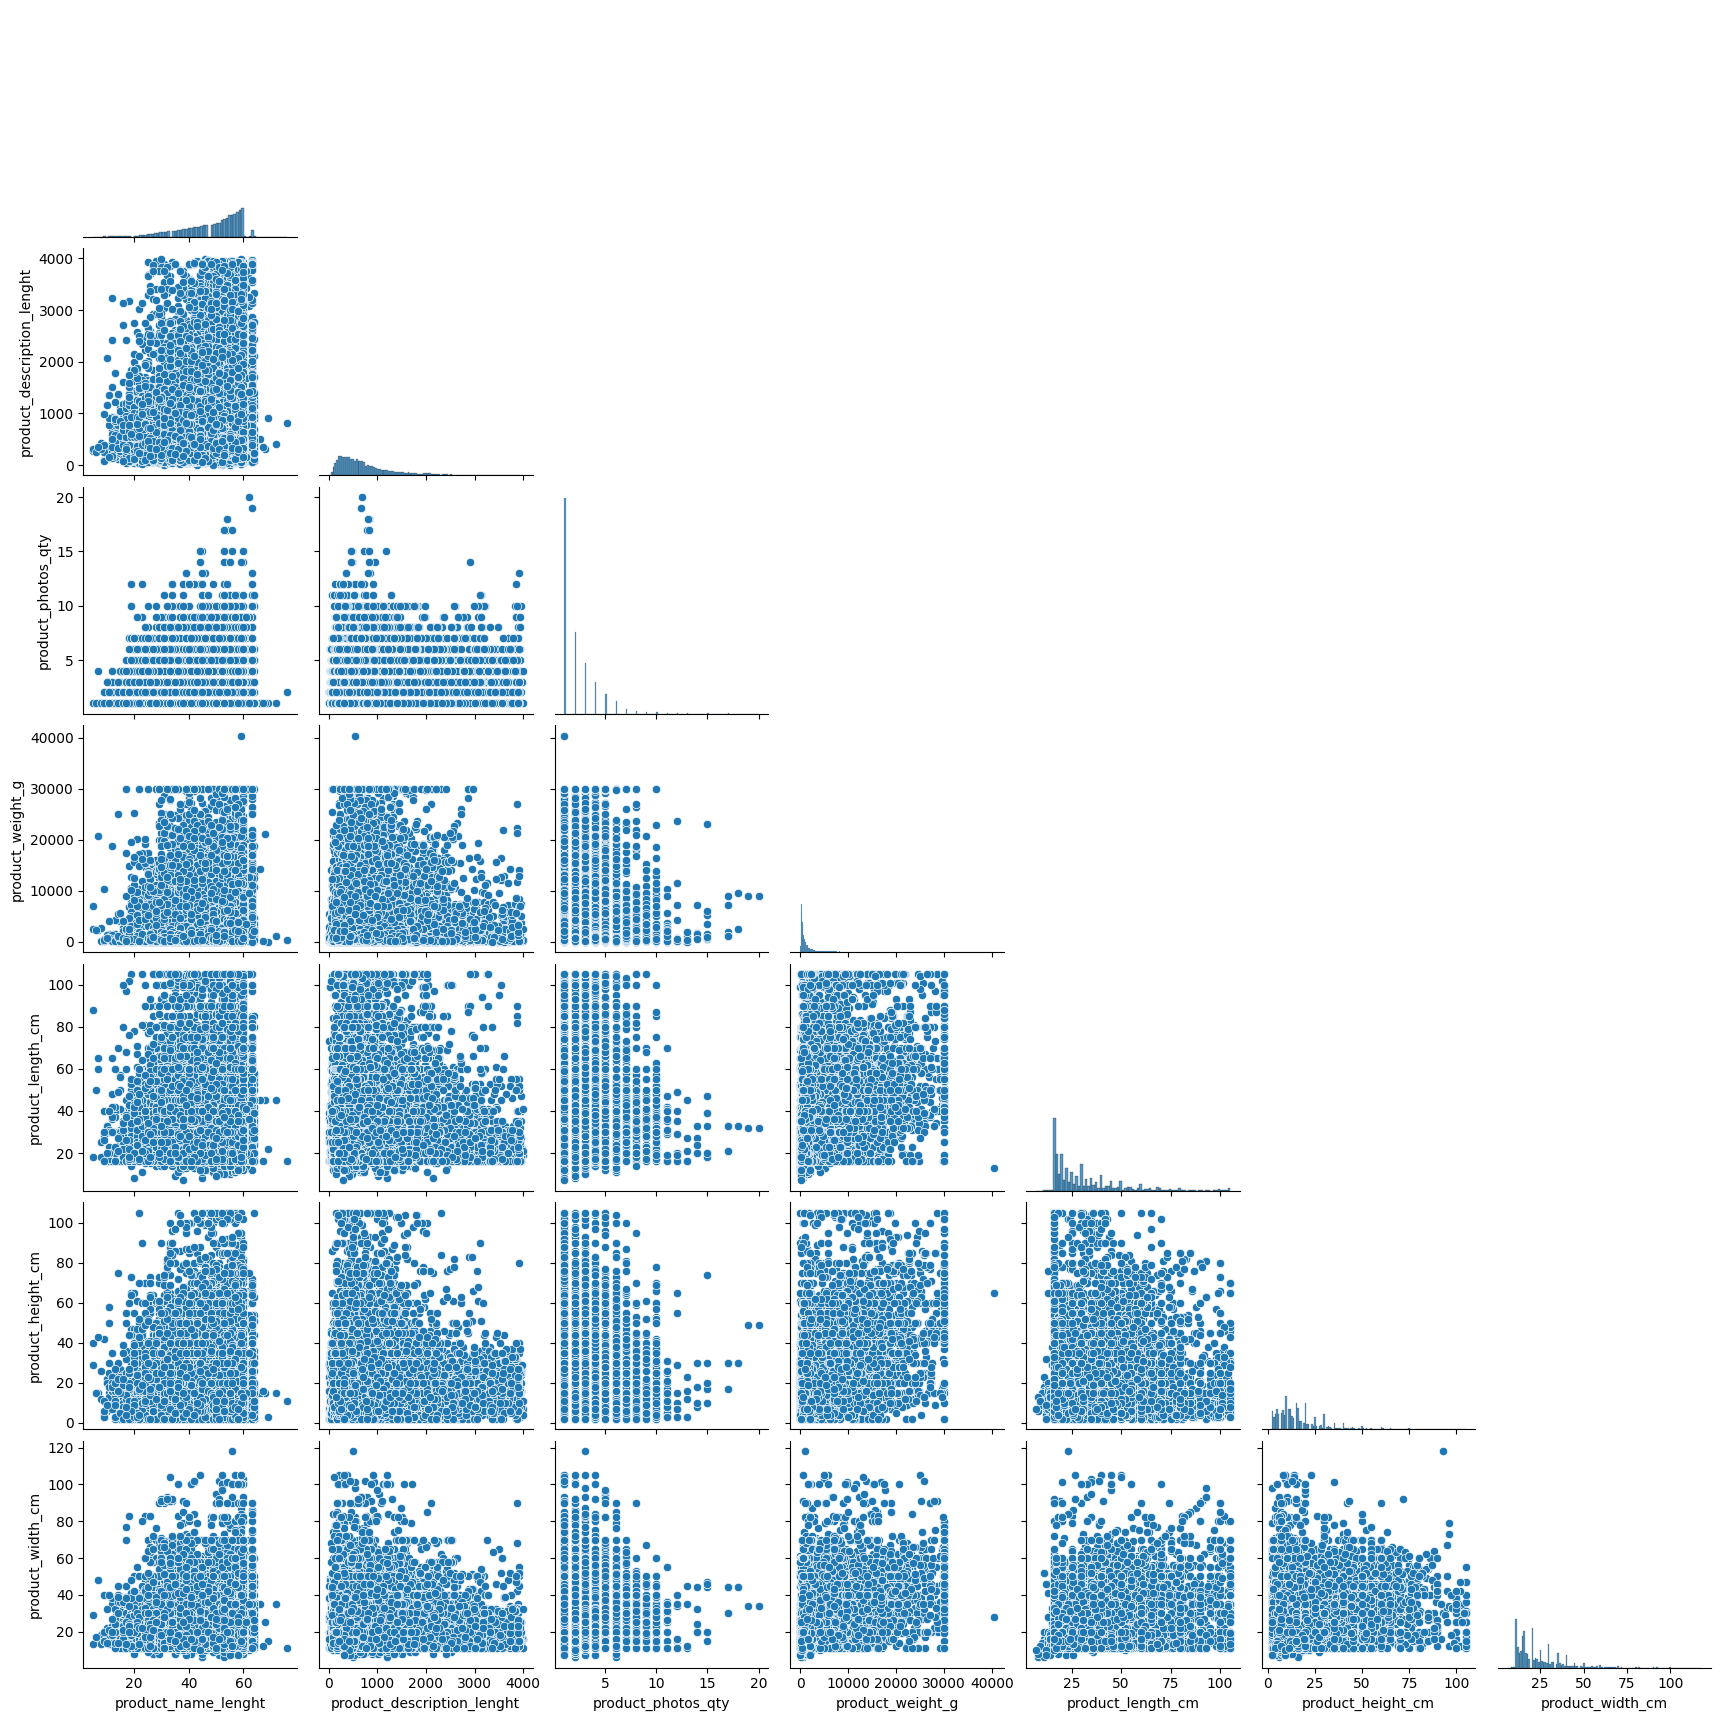

In [15]:
visuals.pairplots(products_dataset, ["product_name_lenght", "product_description_lenght", "product_photos_qty", 
                                        "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"])

## Data Cleaning & Feature Engineering

1. Remove all missing values
2. Remove all outliers
3. New column: *product_volume* (*product_length_cm* * *product_height_cm* * *product_width_cm*)
4. After... Join tables to change spanish category names into english versions

In [16]:
pipeline = make_pipeline(
    cleaning.DropNaRows(products_dataset.columns),
    cleaning.OutlierRemover_IQR(["product_name_lenght", "product_description_lenght", "product_photos_qty", 
                                 "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]),
    feature_engineering.FeatureAdder("product_volume_cm3", 
                                     lambda X: X["product_length_cm"] * X["product_height_cm"] * X["product_width_cm"])
)

In [17]:
products_dataset_final = pipeline.fit_transform(products_dataset)
products_dataset_final

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...,...
32945,c4e71b64511b959455e2107fe7859020,utilidades_domesticas,59.0,1371.0,2.0,200.0,18.0,15.0,15.0,4050.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,8060.0


In [19]:
# Exchange product_category_name with the english version
products_dataset_final = pd.merge(products_dataset_final, products_category_name_translation, on='product_category_name')
products_dataset_final["product_category_name"] = products_dataset_final["product_category_name_english"]
products_dataset_final.drop(columns=["product_category_name_english"], inplace=True)
products_dataset_final

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...,...
24131,c4e71b64511b959455e2107fe7859020,housewares,59.0,1371.0,2.0,200.0,18.0,15.0,15.0,4050.0
24132,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
24133,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0
24134,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0,8060.0


Well, one category name is not represented in English, so $11$ records are gone but I don't care ;)

Eventually, $26.75\%$ of data has been dropped.

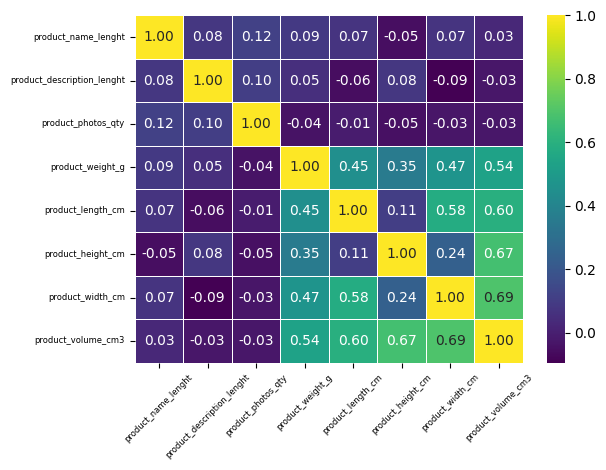

In [21]:
visuals.correlations(products_dataset_final, ["product_name_lenght", "product_description_lenght", 
                                              "product_photos_qty", "product_weight_g", "product_length_cm", 
                                              "product_height_cm", "product_width_cm", "product_volume_cm3"])

In general, the high correlations increased.

No suprises here, the correlations are as expected. The volume of the product is highly correlated with the dimensions of the product. The weight of the product is also highly correlated with the volume of the product. The length, height and width of the product are also highly correlated with the volume of the product. The number of photos of the product is not correlated with any of the other features.

c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset, x=column, kde=True, ax=axes[i], palette=sns.color_palette("viridis", as_cmap=True))
c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset, x=column, kde=True, ax=axes[i], palette=sns.color_palette("viridis", as_cmap=True))
c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataset, x=column, kde=True, ax=axes[i], palette=sns.color_palette("viridis", as_cmap=True))
c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:55: UserWarning: Ignoring `palette` because no `hue` variable has been ass

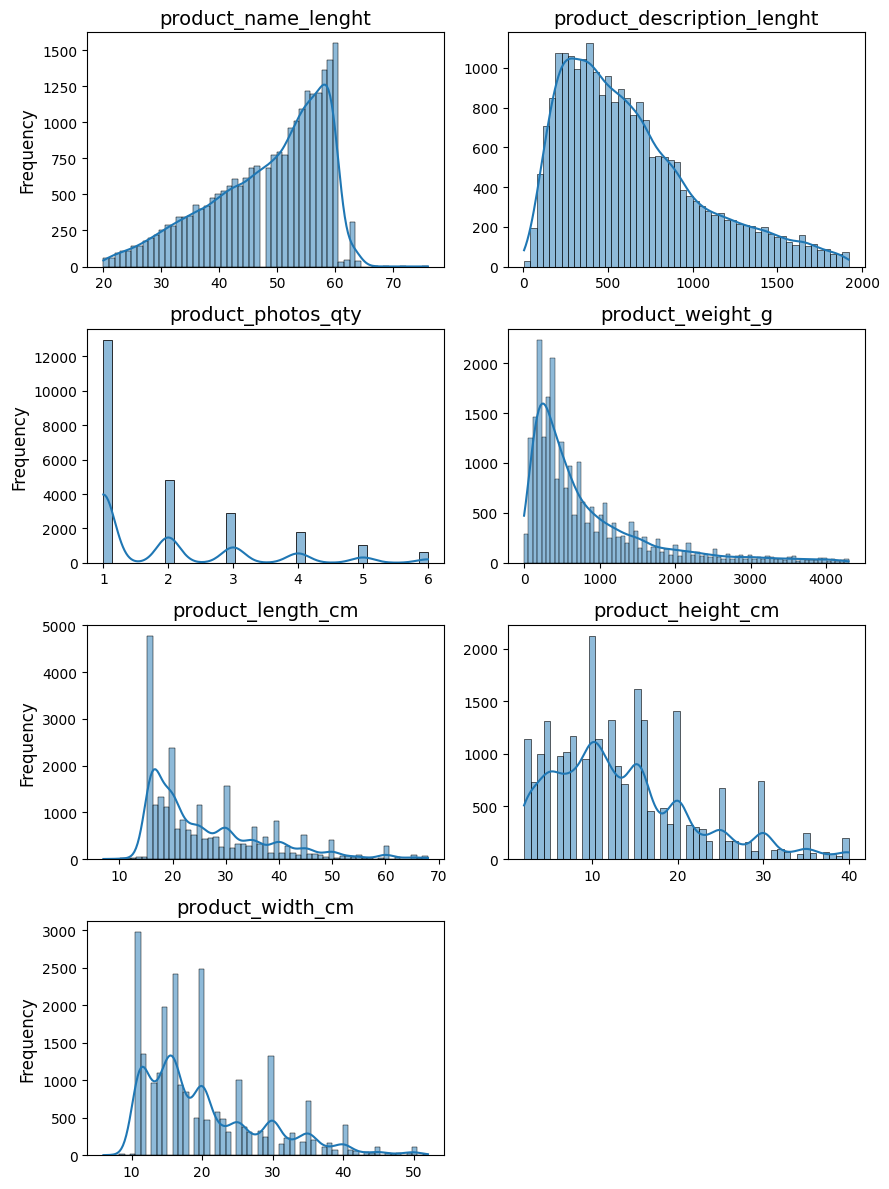

In [23]:
visuals.histograms(products_dataset_final, ["product_name_lenght", "product_description_lenght", "product_photos_qty", 
                                 "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"])

In [ ]:
# products_dataset_final.to_csv("../data/after/products_dataset_final.csv")